# `1.Import Required Libraries`

In [1]:
# Importing time
import time

# Importing Markdown(styling) and display 
from IPython.display import display,Markdown

# Importing libraries. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn libraries
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_predict

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# `2.Read data into pandas Dataframe`

In [2]:
train_df=pd.read_csv("Dataset/train.csv")
test_df=pd.read_csv("Dataset/test.csv")

# view First 5 rows with all cols of train data.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# # view First 5 rows with all cols of test data.  
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- **Observartion**: Test data doesn't have Survived(Target) column, we have to predict those values.

0    549
1    342
Name: Survived, dtype: int64

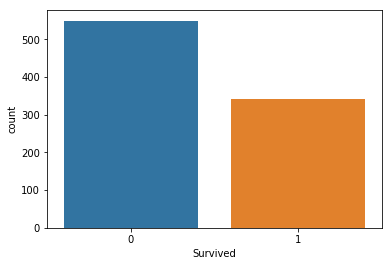

In [4]:
# Check our data is balanced or imbalanced.
sns.countplot(x="Survived",data=train_df)
# Count of each class
train_df.Survived.value_counts()

# `3.Combine both train and test data split target variable`

In [5]:
# Create Target variable and pass the Survived col
y=train_df["Survived"].values
# Drop Target variable in train data
train_df.drop(["Survived","PassengerId"],inplace=True,axis=1)
test_df.drop(["PassengerId"],inplace=True,axis=1)
train_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Observation**: Survived col is removed from train data

In [6]:
# create new variable train and pass "1" for train data and "0" for test data to retrive test data in future.
train_df["train"]=1
test_df["train"]=0

# It's better to combine both train and test data using pandas concat function.
combined_df=pd.concat([train_df,test_df])

In [7]:
# view combined data.
combined_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [8]:
combined_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0
417,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,0


In [9]:
# Check shape of combined data.
combined_df.shape

(1309, 11)

- Combined data with 1309 rows and 11 cols

# `4.Null Values`
> - Missing values == Information lost.
> - Three types of Missing data Mechanism.
        >**1. Missing Completely at Random (MCAR).**
        >**2. Missing at Random (MAR).**
        >**3. Missing Not at Random (MNAR).**
> - [Detailed Explanation of Mechanisms](https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501)

![](MissingValues.png)

# `4.1 Case Deletion`
> - Case deletion is performed when the column have more than 50% of missing values in it.

In [10]:
# Function to get null values info.
def null_info(data,string):
        data_cols=data.columns[data.isna().any()]
        null_sum=data[data_cols].isna().sum().sort_values(ascending=False)
        null_dtype=data[data_cols].dtypes
        null_percent=round(data[data_cols].isna().mean()*100,2)
        concat=pd.concat([null_sum,null_dtype,null_percent],axis=1,keys=["NaN count","Dtypes","%Ages"],sort=True)
        display(Markdown("### `{}`".format(string)))
        display(concat.head()) 
        
        time.sleep(.5)

        if any(concat["%Ages"] > 50):
            count=sum(concat["%Ages"] > 50)
            index_Count=concat[concat["%Ages"]>50].index.tolist()
            display(Markdown("Found `{}` columns **{}** which have more than 50% of missing values in `{}` ".format(count,index_Count,string)))
            a=input("Want to remove columns which have more than 50% missing values Press Yes or Y :").lower()
            if a in ("y"or"yes"): 
                print(" ")
                concat.drop(index_Count,inplace=True,axis=0)
                display(Markdown(">**Removed** columns `{}` from data".format(index_Count)))
            else:
                print(" ")
                display(Markdown(">`No columns` are removed"))
        display(concat)
        return (concat.index,index_Count)

In [11]:
# Null_info function returns cols that are present and cols are deleted.
null_df,del_rows=null_info(combined_df,"Null values on train Data")

### `Null values on train Data`

,NaN count,Dtypes,%Ages
Age,263,float64,20.09
Cabin,1014,object,77.46
Embarked,2,object,0.15
Fare,1,float64,0.08


Found `1` columns **['Cabin']** which have more than 50% of missing values in `Null values on train Data` 

Want to remove columns which have more than 50% missing values Press Yes or Y : y


>**Removed** columns `['Cabin']` from data

,NaN count,Dtypes,%Ages
Age,263,float64,20.09
Embarked,2,object,0.15
Fare,1,float64,0.08


- Removed col which have more than 50% of missing values 

In [12]:
# view cols which are not removed by null_info function.
null_df

Index(['Age', 'Embarked', 'Fare'], dtype='object')

In [13]:
# create new dataframe and add those cols with values, because we don't want to spoil the original dataframes
# by adding,removing, modifying values and doing mutiple operations.
model_df= combined_df[null_df]

In [14]:
# view new dataframe
model_df.head()

,Age,Embarked,Fare
0,22.0,S,7.2500
1,38.0,C,71.2833
2,26.0,S,7.9250
3,35.0,S,53.1000
4,35.0,S,8.0500


In [15]:
# Get count of missing values
model_df.isna().sum()

Age         263
Embarked      2
Fare          1
dtype: int64

# `4.2 Imputation`
> - Filling Missing values (holes) in data.
> - Many ways to deal with missing values.

![](MissingValues.png)

In [16]:
# function for imputation and display result.head of 2.
def imputation(data):
    data_numeric=data.select_dtypes(include=np.number)
    data_categorical=data.select_dtypes(exclude=np.number)
    display(Markdown("## `Before imputation`"))
    display(data[data_numeric.isna().values].head(2))
    display(data[data_categorical.isna().values].head(2))
    data.fillna(data_numeric.median(),inplace=True) # imputing with median robust to outliers.
    for i in data_categorical.columns:
        data[i].fillna(data[i].value_counts().index[0], inplace=True) # imputing categorical with mode (most frequent).
    display(Markdown("## `After imputation`"))
    display(data[data_numeric.isna().values].head(2))
    display(data[data_categorical.isna().values].head(2))

In [17]:
imputation(model_df)

## `Before imputation`

,Age,Embarked,Fare
5,NaN,Q,8.4583
17,NaN,S,13.0000


,Age,Embarked,Fare
61,38.0,NaN,80.0
829,62.0,NaN,80.0


## `After imputation`

,Age,Embarked,Fare
5,28.0,Q,8.4583
17,28.0,S,13.0000


,Age,Embarked,Fare
61,38.0,S,80.0
829,62.0,S,80.0


In [18]:
def remove_exists(data1,data2,del_rows):
    data1.drop(data2.columns,axis=1,inplace=True)
    data1.drop(del_rows,axis=1,inplace=True)
    display(data1.head())
remove_exists(combined_df,model_df,del_rows)

,Pclass,Name,Sex,SibSp,Parch,Ticket,train
0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,1
2,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,1
4,3,"Allen, Mr. William Henry",male,0,0,373450,1


# `5.Separate numeric and categorical variables for analysis`

In [19]:
# Get Numeric and Categorical Values into separate
def numr_cate(data):
    data_numr=data.select_dtypes(include=np.number)
    data_cate=data.select_dtypes(exclude=np.number)
    display(Markdown("## `Numeric Columns`"))
    display(data_numr.head())
    display(Markdown("## `Categorical Columns`"))
    display(data_cate.head())
    return data_numr,data_cate
df_num,df_cate=numr_cate(combined_df)

## `Numeric Columns`

,Pclass,SibSp,Parch,train
0,3,1,0,1
1,1,1,0,1
2,3,0,0,1
3,1,1,0,1
4,3,0,0,1


## `Categorical Columns`

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,"Allen, Mr. William Henry",male,373450


In [20]:
df_num.head()

,Pclass,SibSp,Parch,train
0,3,1,0,1
1,1,1,0,1
2,3,0,0,1
3,1,1,0,1
4,3,0,0,1


In [21]:
df_cate.head()

,Name,Sex,Ticket
0,"Braund, Mr. Owen Harris",male,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803
4,"Allen, Mr. William Henry",male,373450


- Ticket col is mix of categorical and numerical and have more distinct values.

In [22]:
# Drop ticket column
df_cate.drop("Ticket",axis=1,inplace=True)

In [23]:
# combine categorical and numeric dataframe to model_df.
model_df[df_cate.columns]=df_cate.copy()
model_df[df_num.columns]=df_num.copy()

In [24]:
model_df.head()

,Age,Embarked,Fare,Name,Sex,Pclass,SibSp,Parch,train
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",male,3,1,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",female,3,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",male,3,0,0,1


# `6.Feature engineering`

In [25]:
model_df.head()

,Age,Embarked,Fare,Name,Sex,Pclass,SibSp,Parch,train
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",male,3,1,0,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,1,0,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",female,3,0,0,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,1,0,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",male,3,0,0,1


In [26]:
model_df["Sex"]=model_df.Sex.map({"male":0,"female":1})

In [27]:
model_df["Embarked"]=model_df.Embarked.map({"S":0,"C":1,"Q":2})

In [28]:
# combine SibSp and Parch to one variable called family
model_df["family"]=model_df["SibSp"] + model_df["Parch"] + 1 

In [29]:
# Titles  
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
model_df['Title'] = model_df.Name.str.extract(' ([A-Za-z]+)\.', expand= False)
# replace titles with a more common title or as Rare
model_df['Title'] = model_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
model_df['Title'] = model_df['Title'].replace('Mlle', 'Miss')
model_df['Title'] = model_df['Title'].replace('Ms', 'Miss')
model_df['Title'] = model_df['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
model_df['Title'] = model_df['Title'].map(titles)
# filling NaN with 0, to get safe
model_df['Title'] = model_df['Title'].fillna(0)

In [30]:
# Binning age with certain values
model_df['Age'] = model_df['Age'].astype(int)
model_df.loc[ model_df['Age'] <= 11, 'Age'] = 0
model_df.loc[(model_df['Age'] > 11) & (model_df['Age'] <= 18), 'Age'] = 1
model_df.loc[(model_df['Age'] > 18) & (model_df['Age'] <= 22), 'Age'] = 2
model_df.loc[(model_df['Age'] > 22) & (model_df['Age'] <= 27), 'Age'] = 3
model_df.loc[(model_df['Age'] > 27) & (model_df['Age'] <= 33), 'Age'] = 4
model_df.loc[(model_df['Age'] > 33) & (model_df['Age'] <= 40), 'Age'] = 5
model_df.loc[(model_df['Age'] > 40) & (model_df['Age'] <= 66), 'Age'] = 6
model_df.loc[ model_df['Age'] > 66, 'Age'] = 6

In [31]:
model_df['Fare'] = model_df['Fare'].astype(int)
# Binning Fare 
model_df.loc[ model_df['Fare'] <= 7.91, 'Fare'] = 0
model_df.loc[(model_df['Fare'] > 7.91) & (model_df['Fare'] <= 14.454), 'Fare'] = 1
model_df.loc[(model_df['Fare'] > 14.454) & (model_df['Fare'] <= 31), 'Fare'] = 2
model_df.loc[(model_df['Fare'] > 31) & (model_df['Fare'] <= 99), 'Fare'] = 3
model_df.loc[(model_df['Fare'] > 99) & (model_df['Fare'] <= 250), 'Fare'] = 4
model_df.loc[ model_df['Fare'] > 250, 'Fare'] = 5

In [32]:
# dropping extra columns 
model_df.drop(["SibSp","Parch","Name"],axis=1,inplace=True)
model_df.head()

,Age,Embarked,Fare,Sex,Pclass,train,family,Title
0,2,0,0,0,3,1,2,1
1,5,1,3,1,1,1,2,3
2,3,0,0,1,3,1,1,2
3,5,0,3,1,1,1,2,3
4,5,0,1,0,3,1,1,1


In [33]:
# Divide train and test data 
X_train=model_df[model_df.train==1]
X_test=model_df[model_df.train==0]
Y_train=y # target variable
X_train.drop("train",axis=1,inplace=True)
X_test.drop("train",axis=1,inplace=True)

In [34]:
X_train.head()

,Age,Embarked,Fare,Sex,Pclass,family,Title
0,2,0,0,0,3,2,1
1,5,1,3,1,1,2,3
2,3,0,0,1,3,1,2
3,5,0,3,1,1,2,3
4,5,0,1,0,3,1,1


In [35]:
X_test.head()

,Age,Embarked,Fare,Sex,Pclass,family,Title
0,5,2,0,0,3,1,1
1,6,0,0,1,3,2,3
2,6,2,1,0,2,1,1
3,3,0,1,0,3,1,1
4,2,0,1,1,3,3,3


In [36]:
X_train.shape,X_test.shape

((891, 7), (418, 7))

# `7.Building Model on different Algorithms`

In [37]:
# SGD Classifier
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [38]:
# Random tree classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [39]:
# Gradient boosting
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)
acc_GBC = round(GBC.score(X_train, Y_train) * 100, 2)

In [40]:
# Logistic regression.
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [41]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [42]:
# Guassian navie bayes.
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [43]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [44]:
# Linear support vector classifier.
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [45]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)* 100, 2)

In [46]:
# Table for scores
results = pd.DataFrame({
'Model': ['Support Vector Machines','GBC', 'KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent',
'Decision Tree'],
'Score': [acc_linear_svc,acc_GBC, acc_knn, acc_log,
acc_random_forest, acc_gaussian, acc_perceptron,
acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
90.68,Random Forest
90.68,Decision Tree
86.64,GBC
85.07,KNN
81.59,Logistic Regression
81.26,Support Vector Machines
80.36,Naive Bayes
79.57,Perceptron
78.11,Stochastic Gradient Decent


- Select Algorithm with high score

In [47]:
# select random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
# Cross validation == n * (train_test_split) and scoring 
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.83333333 0.78651685 0.85393258 0.87640449 0.84269663
 0.85393258 0.75280899 0.82022472 0.82954545]
Mean: 0.822717341958915
Standard Deviation: 0.03689582378963922


In [48]:
# Feature importances with random forest
importances =pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.215
Sex,0.205
Age,0.159
family,0.129
Fare,0.126
Pclass,0.118
Embarked,0.048


# `8.Hyperparameter optimization`

# find best parameters using gridsearchcv
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
               "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000,1500]}

from sklearn.model_selection import RandomizedSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto',
                            oob_score=True,random_state=1, n_jobs=-1)
clf = RandomizedSearchCV(estimator=rf,cv=5, param_distributions=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train);

clf.best_params_

In [49]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini",
                                        min_samples_leaf = 1,
                                        min_samples_split = 10,
                                        n_estimators=100,
                                        max_features='auto',
                                        oob_score= True,
                                        random_state=1,
                                        n_jobs=-1)
random_forest.fit(X_train, Y_train)
print("oob score:", round(random_forest.score(X_train,Y_train), 4)*100, "%")

oob score: 88.1 %


# `9.Evaluation`

In [50]:
# Evaluation of model using classification metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
# cross validation prediction 
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)

array([[499,  50],
       [ 93, 249]])

In [51]:
# Precision and recall score 
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8327759197324415
Recall: 0.7280701754385965


In [52]:
# Getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

In [53]:
# Roc_Auc score 
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9357284376697663


# `10.Submission`

In [54]:
# make prediction and ready for submitting
predictionss=random_forest.predict(X_test)

In [55]:
# make submission file for kaggle
kaggle=pd.read_csv("Dataset/test.csv")
submission =pd.DataFrame({'PassengerId':kaggle["PassengerId"],'Survived':predictionss})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [56]:
# check for shape
submission.shape

(418, 2)

In [57]:
# save to csv file
submission.to_csv("kaggle titanic.csv",index=False)